#### 통계적 추정 : 모수 즉 모집단의 파라미터를 추정
- 모집단 분포가 정규분포임을 가정했을 때 모수를 알면 모집단 분포를 추정할 수 있음
- 점추정 : 모수를 어느 1개의 값으로 추정하는 방법
 - 모평균 추정에 표본평균을 사용하는데 표본평균은 불편성과 일치성을 가지고 있는 통계량이기 때문임
 - 모분산의 점추정값으로 표본에서 계산된 통계량으로 불편분산을 사용
- 구간추정 : 추정값이 폭을 가지게 하는 추정 방법. 추정의 폭 계산에는 확률의 개념을 사용
 - 폭을 가지므로 추정오차를 가미할 수 있으며 추정오차가 작으면 구간 추정의 폭이 좁아짐.
 - 샘플사이즈가 커져도 구간 추정의 폭은 좁아짐
- 신뢰계수(신뢰수준)와 신뢰구간
 - 신뢰계수란 구간 추정의 폭에 대한 신뢰 정도를 확률로 표현한 것. 95%, 99%
 - 신뢰구간이란 특정 신뢰계수를 만족하는 구간
 - 신뢰계수가 클수록 신뢰구간의 폭이 넓어짐
- 신뢰한계 : 신뢰구간의 하한값과 상한값
- 신뢰구간 계산 : "(표본평균 - 모평균) / 표준오차"로 계산한 t값. 구간추정을 할 때는 t분포의 퍼센트포인트 사용
 - 신뢰계수를 95%라고 했을 때 t분포를 따른다면 2.5% 지점과 97.5% 지점을 계산. 
 - t분포를 따르는 변수가 이 구간에 들어갈 확률은 95%가 됨
 - 표본의 분산 크기가 커지면 신뢰구간의 폭이 넓어짐
 - 샘플사이즈가 커지면 자유도가 커지고 표준오차가 작아짐
 - 신뢰계수가 커질수록 안전해진다고 볼 수 있으며 신뢰구간의 폭이 넓어짐
 
[모평균 μ의 신뢰구간을 추정]  

만약 누군가가 점추정를 통해 "A후보의 지지율은 54.3%입니다"라고 말한다면, 자신감 있어 보이더라도 틀린 말이 될 수 있다. 실제 지지율이 54.9%라면 말이다. 이와 같은 점추정은 틀릴 가능성이 높다. 반면 구간추정을 통해 "A후보의 지지율은 신뢰수준 95%로 신뢰구간 51.3%~57.3% 내에 있습니다"라고 말한다면, 좀 더 안전하다. 물론 구간추정도 틀릴 수 있지만, 점추정에 비하면 틀릴 가능성이 적다.  

모수가 신뢰구간 안에 포함되지 않을 확률을 보통 α 로 표현한다. 자연스럽게 모수가 신뢰구간 안에 포함될 확률, 즉 신뢰수준은 1 − α로 표현된다.  
만약 신뢰수준 1 − α이 0.95 즉, 95%라면 α = 0.05 이다.

 <img src='신뢰구간.jpg' STYLE='width:300px;'>

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('dataset/5_7_fl.csv')
df

In [ ]:
# series 형식
fish = df['length']
fish

In [ ]:
# 모평균의 점추정
mu = np.mean(fish)
round(mu,2)

In [ ]:
# 모분산의 점추정
sigma_2 = np.var(fish, ddof=1)
round(sigma_2,2)

In [ ]:
# 자유도
df = len(fish) - 1
df

In [ ]:
# 표준오차
sigma = np.std(fish,ddof=1)
se = sigma/np.sqrt(len(fish))
round(se,2)

In [ ]:
# 신뢰구간 계산 : stats.interval(alpha 신뢰계수, df, loc, scale)
interval = stats.t.interval(
    alpha=0.95, df=df, loc=mu, scale=se)
interval

In [ ]:
# 97.5% 지점
t_975 = stats.t.ppf(q=0.975,df=df)
t_975

In [ ]:
# 하측신뢰한계
lower = mu - t_975*se
lower

In [ ]:
# 상측신뢰한계
upper = mu + t_975*se
upper

In [ ]:
# 표준편차를 10배로 늘려서 신뢰구간 계산
# 표본의 분산 크기가 커지면 신뢰구간의 폭이 넓어짐
se2 = (sigma*10) / np.sqrt(len(fish))
stats.t.interval( alpha=0.95, df=df, loc=mu, scale=se2)

In [ ]:
# 샘플사이즈를 10배로 늘려서 신뢰구간 계산
df2 = (len(fish)*10) - 1
se3 = sigma / np.sqrt(len(fish)*10)
stats.t.interval(alpha=0.95, df=df2, loc=mu, scale=se3)

In [ ]:
# 신뢰계수가 커질수록 안전해진다고 볼 수 있으며 신뢰구간의 폭이 넓어짐
# 99% 신뢰수준의 신뢰구간
stats.t.interval(alpha=0.99, df=df, loc=mu, scale=se)
# (3.597010056835825, 4.777068592173221) 95%

In [ ]:
# 95% 신뢰수준의 신뢰구간을 구하는 시행
be_included_array = np.zeros(20000, dtype = 'bool')
be_included_array

In [ ]:
# 신뢰구간이 모평균(4)를 포함하면 True
np.random.seed(1)
norm_dist = stats.norm(loc=4,scale=0.8)
for i in range(0,20000):
    sample = norm_dist.rvs(size=10)
    df = len(sample) - 1
    mu = np.mean(sample)
    std = np.std(sample, ddof=1)
    se = std/np.sqrt(len(sample))
    interval = stats.t.interval(0.95, df, mu, se)
    if(interval[0] <= 4 and interval[1] >= 4):
        be_included_array[i] = True
        
sum(be_included_array) / len(be_included_array)

- 통계적 가설검정은 표본을 사용해서 모집단에 대한 통계적인 판단을 내리는 방법
- 판단의 기준으로 통계적인 표현을 사용하며 간단히 검정이라고 부름
- 평균값의 차이만으로 유의미한 차이를 얻을 수 없으며 샘플사이즈와 데이터의 흩어짐 크기를 가미하는 것이 필요
- 1변량 데이터의 t검정
 - 샘플사이즈가 크고 데이터의 분산이 작고 평균값의 차이가 크다는 세가지 조건을 만족하는 지표를 t값이라고 함
 - t값 = (표본평균 - 비교대상값) / 표준오차
 - t값이 크면 유의미한 차이가 있다고 판단
- 귀무가설 대립가설
 - 기각 대상이 되는 첫번째 가설을 귀무가설, 귀무가설과 대립되는 가설을 대립가설이라고 함
 - 귀무가설이 기각된다면 즉 귀무가설이 틀렸다고 판단을 하면 유의미한 차이가 있다는 것임
- p값(유의확률) : 표본과 귀무가설 간의 모순을 나타내는 지표
 - p값이 작을수록 귀무가설과 표본이 모순된다고 판단
- 유의수준 : 귀무가설을 기각하는 기준이 되는 값
 - 유의수준은 위험률이라고 하며 5%를 사용하는 경우가 많음

In [ ]:
junk_food = pd.read_csv('dataset/5_8_jfw.csv').weight
junk_food.head()

In [ ]:
# 표본평균
mu = np.mean(junk_food)
mu

In [ ]:
# 자유도
df = len(junk_food) - 1
df

In [ ]:
# 표준오차
sigma = np.std(junk_food, ddof=1)
se = sigma/np.sqrt(len(junk_food))
se

In [ ]:
# t값이 크면 유의미한 차이가 있다고 판단할 수 있음
# 봉지과자의 평균 중량이 50g이다.(귀무가설)
# 봉지과자의 평균 중량은 50g과 유의미하게 차이가 있다(대립가설)
t_value = (mu - 50) / se
t_value

In [ ]:
# p값(유의 확률) 이 유의수준 0.05 보다 작으므로 귀무가설을 기각
# 봉지과자의 평균 중량은 50g과 유의미하게 차이가 있다는 판단이 가능
alpha = stats.t.cdf(t_value, df=df)
(1-alpha)*2 # 양측검정

In [ ]:
# t검정 : stats.ttest_1samp()
stats.ttest_1samp(junk_food,50)

- 대응표본 t검정 : 약을 먹기 전과 후에 체온의 차이를 보는 경우 사용
- 독립표본 t검정 : 큰 바늘로 낚은 물고기의 길이와 작은 바늘로 낚은 물고기의 길이의 차이를 보는 경우 사용
 - welch 근사법이라고 불리는 방법을 이용해서 p값 계산. welch 검정이라고 함

In [ ]:
paired_test_data = pd.read_csv('dataset/5_9_ptt.csv')
paired_test_data

In [ ]:
before = paired_test_data.query('medicine=="before"')['body_temperature']
after = paired_test_data.query('medicine=="after"')['body_temperature']
# 배열로 변환
before = np.array(before)
after = np.array(after)
diff = after - before
diff

In [ ]:
# 평균값이 0과 다른지 검정
# 유의미한 차이가 있다고 주장할 수 있음
stats.ttest_1samp(diff,0)

In [ ]:
# 독립표본 t검정
# 평균치
mean_bef = np.mean(before)
mean_aft = np.mean(after)
# 분산
sigma_bef = np.var(before, ddof=1)
sigma_aft = np.var(after, ddof=1)
# 샘플사이즈
m=len(before)
n=len(after)
# t값
t_value=(mean_aft-mean_bef) / np.sqrt((sigma_bef/m + sigma_aft/n))
t_value


In [ ]:
# 유의미한 차이가 있다고 판단
# equal_var = False : 분산이 다르다고 가정한 t검정(Welch 검정)
stats.ttest_ind(after,before,equal_var=False)

In [ ]:
# 분할표에 대한 독립성 검정
click_data = pd.read_csv('dataset/5_10_cd.csv')
click_data

In [ ]:
# 분할표
# 이를 빈도분석이라고 부른다.
cross = pd.pivot_table(data=click_data, values='freq',
                       aggfunc='sum',index='color',columns='click')
cross

In [ ]:
# 독립성 검정
# 카이스퀘어 통계량, p값, 자유도, 기대도수표(배열 형태)대로 출력, 보정 안함
# 카이스퀘어 검정 시 기대도수가 전부 5 이상이어야 함
# p값이 0.05 보다 작으므로 색에 따라 버튼을 클릭하는 것이 유의미하게 변한다고 판단
stats.chi2_contingency(cross, correction=False)

Q. "dataset/5_2_shoes.csv"을 데이터프레임으로 불러와서 아래 작업을 수행하세요.

- 4행 3열을 복사하여 수직으로 결합하여 8행 3열의 데이터프레임 df로 만드세요.
- 교차분석표를 만드세요(values = 'sales', aggfunc = 'sum', index = 'store', columns = 'color')
- 독립성 검정을 수행하세요

In [ ]:
df = pd.read_csv('dataset/5_2_shoes.csv')
df

In [ ]:
df = pd.concat([df,df], ignore_index = True)
df

In [ ]:
df_pivot = pd.pivot_table(data = df, values = 'sales', aggfunc = 'sum', index = 'store', columns = 'color')
df_pivot

In [ ]:
# 독립성 검정
# 카이스퀘어 통계량, p값, 자유도, 기대도수표(배열 형태)대로 출력, 보정 안함
# 카이스퀘어 검정 시 기대도수가 전부 5 이상이어야 함
# p값이 0.05 보다 작으므로 색에 따라 버튼을 클릭하는 것이 유의미하게 변한다고 판단
stats.chi2_contingency(df_pivot, correction=False)

In [ ]:
# 파이썬에서의 R이라고 생각하면 된다.
!pip install statsmodels

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [9]:
# 기온에 따른 맥주의 매출
beer = pd.read_csv('dataset/7_1_beer.csv')
beer

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8
5,40.9,4.2
6,60.2,13.5
7,63.3,26.0
8,51.1,23.3
9,44.9,8.5


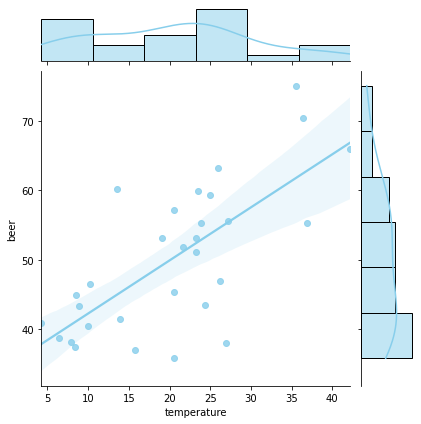

In [10]:
# 그래프 (jointplot : 두 개 변수의 히스토그램과 산점도 분포표를 동시에 그려준다.)
# 회귀(regretion)의 약자 reg -> 회귀선을 직선으로 그려줌

# 단순 회귀 분석
sns.jointplot(x = 'temperature', y = 'beer', kind = 'reg', data = beer, color = 'skyblue')


In [11]:
# 모델 구축 : 종속변수 맥주 매상, 독립변수 기온인 정규선형모델
# Ordinary Least Squares(최소제곱법) -> ols
lm_model = smf.ols(formula = 'beer ~ temperature', data = beer).fit()

In [12]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Wed, 13 Jan 2021   Prob (F-statistic):           1.11e-05
Time:                        10:35:45   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
df = pd.read_csv('dataset/auto-mpg.csv')
df_mw = df[['mpg','weight']]
df_mw

,mpg,weight
0,18.0,3504
1,15.0,3693
2,18.0,3436
3,16.0,3433
4,17.0,3449
...,...,...
393,27.0,2790
394,44.0,2130
395,32.0,2295
396,28.0,2625


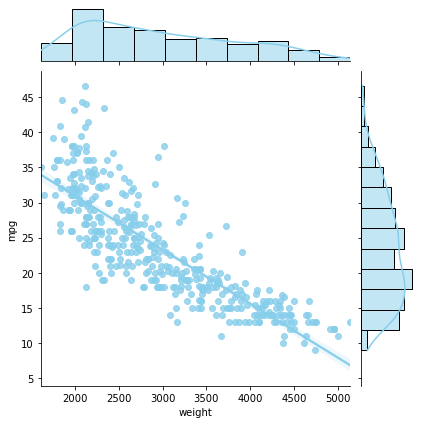

In [15]:
# 단순 회귀 분석
sns.jointplot(x = 'weight', y = 'mpg', kind = 'reg', data = df_mw, color = 'skyblue')

In [16]:
# 모델 구축 : 종속변수 맥주 매상, 독립변수 기온인 정규선형모델
# Ordinary Least Squares(최소제곱법) -> ols
lm_model = smf.ols(formula = 'mpg ~ weight', data = df_mw).fit()

In [17]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Wed, 13 Jan 2021   Prob (F-statistic):          2.97e-103
Time:                        11:17:31   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.3174      0.795     58.243      0.000      44.754      47.881
weight        -0.0077      0.000    -29.814      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       40.423   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.695
Skew:                           0.713   Prob(JB):                     4.89e-13
Kurtosis:                       4.176   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# Null 모델 AIC
null_model = smf.ols('beer ~ 1', data = beer).fit()
null_model.aic

227.94194972563105

In [19]:
# 독립변수가 있는 모델의 AIC (AIC는 낮은 것이 좋다.)
lm_model = smf.ols('beer ~ temperature', data = beer).fit()
lm_model.aic

208.9090293557544

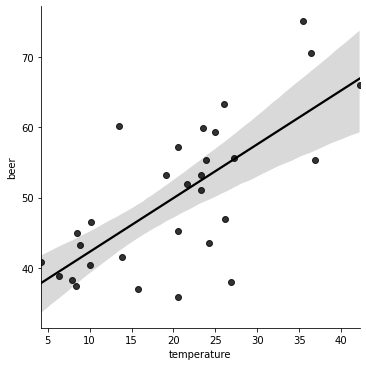

In [20]:
# 회귀직선
sns.lmplot(x = 'temperature', y = 'beer', data = beer, 
           scatter_kws = {'color':'black'},
          line_kws = {'color' : 'black'})

In [21]:
# AIC의 기존 x값들에 대한 예측값을 뽑아내기
lm_model.predict()

array([50.3014808 , 53.74590495, 42.26449113, 55.20021737, 46.70397114,
       37.82501112, 44.94348769, 54.51133254, 52.44467805, 41.11634975,
       54.66441806, 49.22988218, 53.21010564, 52.44467805, 41.03980699,
       52.59776357, 45.24965873, 61.78289462, 55.42984564, 50.3014808 ,
       42.41757665, 50.3014808 , 51.14345115, 40.6570932 , 66.91125946,
       52.9039346 , 62.85449324, 41.42252079, 62.47177945, 39.50895182])

In [22]:
# 기온이 0도일 때, 맥주 매상의 기대값
lm_model.predict(pd.DataFrame({'temperature':[0]}))

0    34.610215
dtype: float64

In [23]:
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [24]:
# 기온이 20일때의 맥주 매상 기대값
beta0 = lm_model.params[0] # 절편
beta1 = lm_model.params[1]
temperature = 20 # x의 계수
beta0 + beta1 * temperature

49.91876701095053

In [25]:
# 기온이 20도일 때, 맥주 매상의 기대값
lm_model.predict(pd.DataFrame({'temperature':[20]}))

0    49.918767
dtype: float64

In [26]:
# 잔차 계산
# 회귀예측식으로 구하는 것과 실제 y값의 차이
resid = lm_model.resid
resid.head()

0    -5.001481
1     5.554095
2    -1.864491
3   -17.200217
4    -9.703971
dtype: float64

In [27]:
# 잔차 = 실제값 - 예측값
y_hat = beta0 + beta1 * beer.temperature # 예측값
# beer.beer # 실제값
(beer.beer - y_hat).head()

0    -5.001481
1     5.554095
2    -1.864491
3   -17.200217
4    -9.703971
dtype: float64

In [28]:
# 결정계수
mu = np.mean(beer.beer) # 매상액의 평균
y = beer.beer
yhat = lm_model.predict() # 예측식

np.sum((yhat - mu)**2)/np.sum((y-mu)**2)

0.503959323061188

In [29]:
lm_model.rsquared

0.5039593230611856

In [35]:
# 수정된 결정계수: 독립변수가 늘어나는 것에 대해 패널티를 적용한 결정계수
# 독립변수의 수가 늘어나면 결정계수가 큰 값이 되며 
# 과학습을 일으킬 소지가 있으므로 조정이 필요하다.
n = len(beer.beer)
s = 1 # 독립변수의 수
1 - ((np.sum(resid**2)/(n - s - 1)/(np.sum((y - mu)**2))/(n-1)))

0.9993891124668242

In [33]:
lm_model.rsquared_adj

0.4862435845990851

In [30]:
# 종속변수의 변동 크기는, 모델로 설명 가능한 변동과 np.sum((yhat - mu)**2), 
# 모델로 설명하지 못하는 잔차제곱합으로 분해할 수 있다. np.sum((y-mu)**2)

np.sum((y-mu)**2)

3277.1146666666655

In [31]:
np.sum((yhat - mu)**2) + sum(resid**2) # 모델로 설명가능한 부분 + 잔차제곱합
                                       # 종속변수의 변동 크기와 똑같은 값임.

3277.1146666666727

<AxesSubplot:ylabel='Density'>

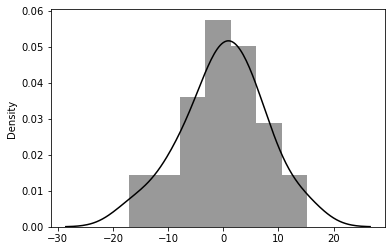

In [36]:
import warnings
warnings.filterwarnings('ignore')
# 잔차 그래프
sns.distplot(resid, color = 'black') # distplot으로 히스토그램 그리기
# 잔차가 거의 정규분포 형태를 이루고 있다.

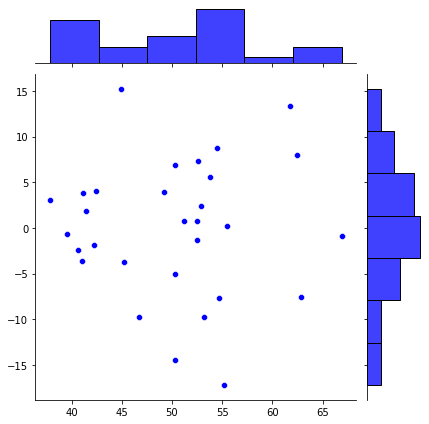

In [37]:
# 잔차의 산포도 : x축 적합도, y축 잔차
sns.jointplot(lm_model.fittedvalues, resid,
             joint_kws = {'color':'blue'},
             marginal_kws = {'color':'blue'})

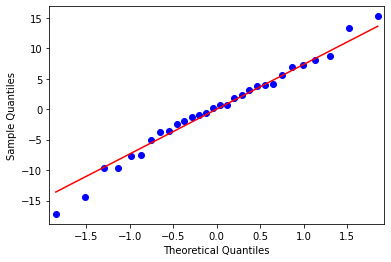

In [38]:
# Q-Q플롯: 이론상의 분위점과 실제 데이터의 분위점을 산포도그래프로 그린 것
# 이론상의 분위점과 실제 데이터의 분위점을 구해서 그 둘을 비교하는 것으로 
# 잔차가 정규분포에 근접하는지 시각적으로 판단
fig = sm.qqplot(resid, line = 's')

In [39]:
# 분산분석
# 1. 수준이 세 개 이상인 경우에 사용
# 2. 변수가 하나인 경우 t-test를 했지만, 
# 변수가 두 개 이상일 경우 분산분석을 사용한다.

#### 분산분석

- 정규선형모델 중 독립변수가 카테고리형 변수인 모델을 분산분석 모델이라고 함. 분산분석은 또한 검정방법의 이름이기도 하다.
- 분산분석은 정규선형모델에서 폭넓게 이용되는 검정방법으로, 평균값의 차이를 검정하는 방법이다.
- 평균값의 차이 검정은 t검정을 이용하지만, 세 개 이상의 수준 간의 평균값 차이 검정은 분산분석을 사용한다.
- 모집단이 정규분포를 따르는 데이터에 대해서만 적용. 또한 수준 사이의 분산값이 다르지 않다는 조건도 충족해야 한다.
- 자료를 분석하는 데 자료의 분산을 활용하는 통계기법으로 실험이나 관측에서 독립변수와 종속변수의 관계를 분석하는 데 활용
- "온도는 생산성에 영향을 주는가?", "유통되는 약들이 당뇨에 미치는 효과는 같은가?" 와 같은 과제를 분석한다.
- 여러 정신과 환자들이 상담, 명상, 그리고 바이오 피드백 세 가지 치료법을 시도하려고 한다. 이 중에서 다른 치료법보다 나은 치료방법이 있는가?
- 한 제조업체는 전구를 만드는 두 가지 공법이 있다. 한 방법이 다른 방법보다 나은가? (수준이 2개이기 때문에 t-test, 분산분석 둘 다 사용 가능하다)
- 서로 다른 두 학교의 학생들이 같은 시험을 치르려 한다. 이 때 한 학교가 다른 학교보다 성적이 더 나은가?(시험이라는 변수는 1개, 학교라는 수준은 2개)
- 독립변수는 정성적이거나 정량적일 수 잇으며, 예에서 온도는 정량적이며 약은 정성적이다.
- 온도가 인자라고 한다면 10도, 20도, 30도와 같이 몇 개의 값을 가지며, 인자를 구성하는 몇 가지 특성을 수준이라고 한다.
- 각 수준은 독립적인 모집단을 구성하고 이에 따라 확률변수가 정의된다.
- 분산분석은 서로 다른 수준을 갖는 모집단들을 대상으로 그들의 평균에 의미가 있는 차이가 있는지 없는지를 검정한다.
- 인자(변수)가 하나인 분산분석을 일원분산분석, 둘이면 이원분산분석, 셋 이상이면 통틀어 다원분산분석이라고 한다.
- 집단 또는 수준은 동일한 독립변수 내의 묶음을 의미한다. "시리얼의 종류" 라는 독립변수가 있다면, 코코볼, 콘푸로스트, 오레오 오즈는 그 아래의 세 수준이 될 수 있다. "칼로리"라는 독립변수의 경우, 가당과 무가당 두 가지 수준을 가질 수 있다.
- 일원분산분석에서는 하나의 인자(변수)의 수준만 처리가 되지만, 이원분산분석에서는 두 인자(변수)의 수준들이 조합되어 처리된다.
- 다음의 가정에 기초한다.
    - 모든 모집단의 확률변수는 정규분포를 갖는다. -> 모집단의 특성을 모수로 설명한다. 표본을 뽑아서 통계량을 통해 표본집단의 특성을 설명한다. 이는 모집단이 정규분포를 이룬다는 가정 하에 진행된다.
    - 모든 모집단의 확률변수인 분산은 sigma squared를 도입한다.
    - 표본이 무작위로 추출되면 모든 표본은 서로 독립적이다.

In [41]:
# 샘플 데이터
weather = ['cloudy', 'cloudy', 'rainy', 'rainy', 'sunny', 'sunny']
beer = [6,8,2,4,10,12]
w_beer = pd.DataFrame({
    'beer':beer,
    'weather' : weather
})
w_beer

,beer,weather
0,6,cloudy
1,8,cloudy
2,2,rainy
3,4,rainy
4,10,sunny
5,12,sunny


<AxesSubplot:xlabel='weather', ylabel='beer'>

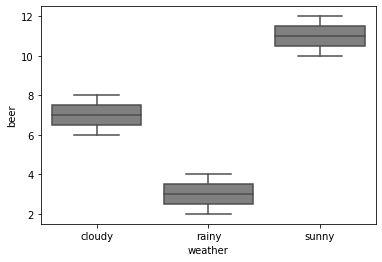

In [42]:
# box plot
sns.boxplot(x = 'weather', y = 'beer', data = w_beer, color = 'gray')

In [43]:
# 날씨 별 매상의 평균 수
w_beer .groupby('weather').mean()

,beer
weather,
cloudy,7
rainy,3
sunny,11


In [44]:
# 날씨에 의한 영향: 2일씩 6일에 대한 날씨별 매상의 평균치
effect = [7,7,3,3,11,11]

In [45]:
# 군 간 변동: 군 간 제곱합
mu_effect = np.mean(effect)
squared_model = np.sum((effect - mu_effect)**2)
squared_model

64.0

In [46]:
# 오차
resid = w_beer.beer - effect
resid

0   -1
1    1
2   -1
3    1
4   -1
5    1
Name: beer, dtype: int64

In [47]:
# 군 내 제곱합 : 오차의 평균값은 0
squared_resid = np.sum(resid**2)
squared_resid          

6

In [48]:
df_model = 2 # 군 간 변동의 자유도(수준의 종류에 따라 결정. 수준(3)-1)
df_resid = 3 # 군 내 변동의 자유도(샘플 사이즈와 수준의 종류에 따라 결정. 샘플(6) - 3 = 3)

In [51]:
# 군 간 평균제곱(분산)
variance_model = squared_model/df_model
variance_model

32.0

In [52]:
# 군 내 평균제곱(분산)
variance_resid = squared_resid/df_resid
variance_resid

2.0

In [ ]:
F비: 효과의 분산 크기/오차의 분산 크기
    군 간 분산과 군 내 분산의 비율
F비가 크면 오차에 비해 효과의 영향이 클 것이라고 판단되기 때문에
F비의 숫자는 클수록 좋다..

In [53]:
# F비: 군간 분산과 군내 분산의 비
f_ratio = variance_model/variance_resid
f_ratio

16.0

In [54]:
import scipy as sp
# p값은 F분포의 누적분포함수에서 계산한다. sp.stats.f.cdf 함수 사용
1 - sp.stats.f.cdf(x = f_ratio, dfn = df_model, dfd = df_resid)
# p값은 0.05 이하이므로 날씨에 의한 매상이 유의미하게 변한다고 판단 가능.

0.02509457330439091

In [55]:
# 범주형에도 smf.ols를 쓸 수 있다.
anova_model = smf.ols('beer ~ weather', data = w_beer).fit()

In [56]:
# 분산분석표
sm.stats.anova_lm(anova_model, typ = 2)

,sum_sq,df,F,PR(>F)
weather,64.0,2.0,16.0,0.025095
Residual,6.0,3.0,NaN,NaN


In [57]:
# 절편이 7, rainy일 때는 -이기 때문에 줄어든다. sunny일때는 늘어난다.
anova_model.params

Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64

In [58]:
# 독립변수를 카테고리형 변수로 한 일반 선형 모델의 예측치는 
# 각 수준의 평균값과 일치한다.
fitted = anova_model.fittedvalues
fitted

0     7.0
1     7.0
2     3.0
3     3.0
4    11.0
5    11.0
dtype: float64

In [68]:
# 분산분석이라는 검정 방법은 일반선형모형에서 일반적으로 사용한다.
# 독립변수가 연속형이어도 가능하다.

beer = pd.read_csv('dataset/7_1_beer.csv')
beer

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8
5,40.9,4.2
6,60.2,13.5
7,63.3,26.0
8,51.1,23.3
9,44.9,8.5


In [ ]:
# 모델 추정
lm_model = smf.ols('beer ~ temperature', data = beer).fit()

In [61]:
# 자유도
# 수준이 없을 경우는 파라미터 개수로 자유도를 설정한다.
df_lm_model = 1 # 모델의 자유도(추정된 파라미터)
df_lm_resid = 28

In [63]:
# F비 계산
lm_effect = lm_model.fittedvalues
# 잔차
lm_resid = lm_model.resid
# 기온의 효과 크기
mu = np.mean(lm_effect)
squares_lm_model = np.sum((lm_effect - mu)**2)
variance_lm_model = squares_lm_model/df_lm_model
# 잔차의 크기
squares_lm_resid = np.sum((lm_resid)**2)
variance_lm_resid = squares_lm_resid / df_lm_resid
# F비
# F비: 군간 분산과 군내 분산의 비
f_value_lm = variance_lm_model/variance_lm_resid
f_value_lm

28.446983688504666

In [64]:
# p값 구하기
# p값은 F분포의 누적분포함수에서 계산한다. sp.stats.f.cdf 함수 사용
1 - sp.stats.f.cdf(x = f_value_lm, dfn = df_lm_model, dfd = df_lm_resid)
# e-05는 소숫점 5자리를 붙이는 것
# p값이 0에 가까우므로 귀무가설을 기각한다.

1.1148907825053733e-05

In [70]:
# 분산분석표
# anova_model = smf.ols('beer ~ temperature', data = beer).fit()
# sm.stats.anova_lm(anova_model, typ = 2)
sm.stats.anova_lm(lm_model, dfd = df_lm_resid)

,df,sum_sq,mean_sq,F,PR(>F)
temperature,1.0,1651.532489,1651.532489,28.446984,0.000011
Residual,28.0,1625.582178,58.056506,NaN,NaN


In [69]:
# 독립변수가 1개인 경우에는 
# 계수의 t검정 결과와 분산분석의 결과가 일치

# t검정 결과 모델 summary
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Wed, 13 Jan 2021   Prob (F-statistic):           1.11e-05
Time:                        15:50:41   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# 독립변수가 여럿인 모델
sales = pd.read_csv('dataset/7_3_lmm.csv')
sales

,humidity,price,sales,temperature,weather
0,29.5,290,229.7,17.8,rainy
1,38.1,290,206.1,26.1,rainy
2,31.5,290,202.5,22.0,rainy
3,39.7,290,195.5,23.0,rainy
4,24.7,290,214.4,14.5,rainy
...,...,...,...,...,...
95,24.2,315,208.4,11.9,sunny
96,33.1,315,215.4,23.0,sunny
97,33.6,315,220.2,22.1,sunny
98,29.6,315,212.6,24.1,sunny


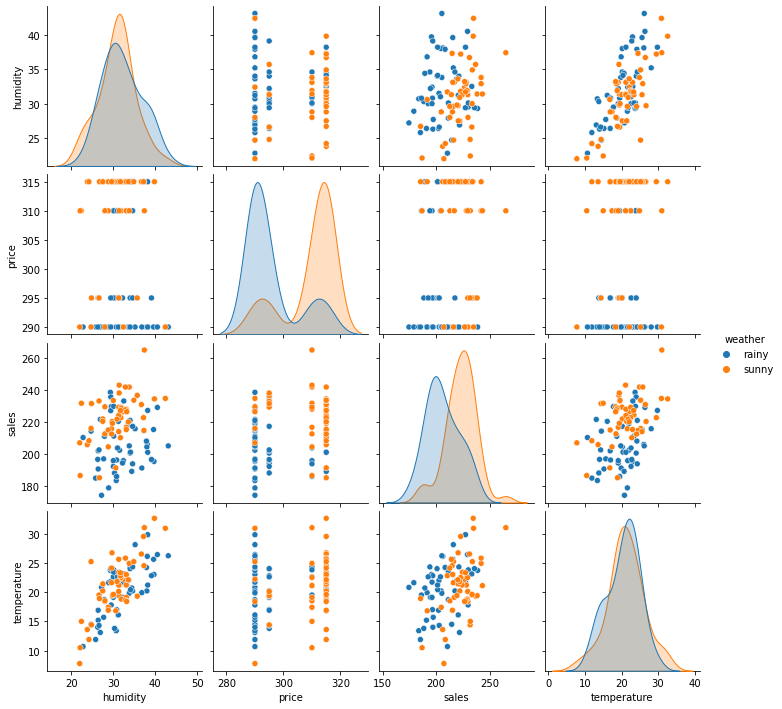

In [84]:
# pairplot() 변수들 간의 관계를 빠르게 보고 싶을 때 쓸 수 있다.
#                          hue(나누는 기준)
sns.pairplot(data = sales, hue = 'weather')

In [77]:
# 독립변수에 가격만 사용한 단순회귀모델 추정
lm_p = smf.ols('sales ~ price', sales).fit()
lm_p.params

Intercept    113.645406
price          0.332812
dtype: float64

In [78]:
# 가격은 매상에 대해 유의미한 영향이 있고, 가격이 오르면 매상도 증가
# : 잘못된 분석이다.
sm.stats.anova_lm(lm_p, typ = 2)

,sum_sq,df,F,PR(>F)
price,1398.392322,1.0,4.970685,0.028064
Residual,27570.133578,98.0,NaN,NaN


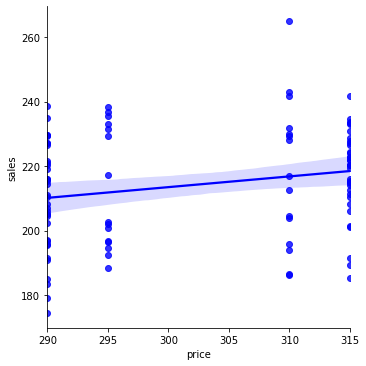

In [80]:
sns.lmplot(x = 'price', y = 'sales', data = sales,
          scatter_kws = {'color':'blue'},
          line_kws = {'color':'blue'})

In [81]:
sales.groupby('weather').mean()

,humidity,price,sales,temperature
weather,,,,
rainy,32.126,295.5,205.924,20.422
sunny,30.852,309.5,222.718,21.102


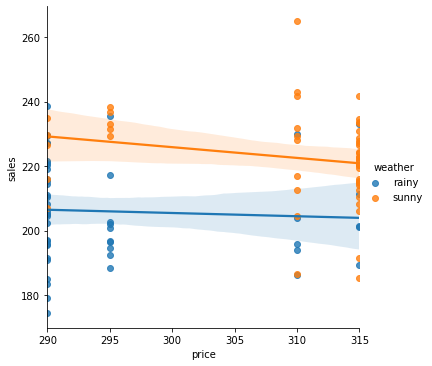

In [83]:
sns.lmplot(x = 'price', y = 'sales', data = sales, hue = 'weather')
# weather라는 변수를 하나 추가함으로써 price와 sales 둘의 
# 관계가 좀더 정확하게 나오는 것을 볼 수 있다.
# 단순히 1독립변수, 1종속변수만 사용해서 데이터를 분석하는것은 위험하다.

In [91]:
# 독립변수가 4개인 모델 추정
# ('종속변수 ~ 독립변수 + 독립변수 + ...')
lm_sales = smf.ols('sales ~ weather + humidity + temperature + price',
                   data = sales).fit()
lm_sales.params

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

In [92]:
# 분산분석표
sm.stats.anova_lm(lm_sales).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,38.848,0.000
humidity,1.0,1779.601,1779.601,9.805,0.002
temperature,1.0,2076.845,2076.845,11.443,0.001
price,1.0,818.402,818.402,4.509,0.036
Residual,95.0,17242.717,181.502,NaN,NaN


In [93]:
# 독립변수의 위치를 바꿨더니 p값이 0.05보다 커졌다.
lm_sales2 = smf.ols('sales ~ weather + temperature + humidity + price',
                   data = sales).fit()
sm.stats.anova_lm(lm_sales2).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,38.848,0.000
temperature,1.0,3814.779,3814.779,21.018,0.000
humidity,1.0,41.667,41.667,0.230,0.633
price,1.0,818.402,818.402,4.509,0.036
Residual,95.0,17242.717,181.502,NaN,NaN
